# Data Exploration Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv('../data/creditcard.csv')

### Have far more non-fraud occurrences than fraud occurrences.

In [3]:
fraud['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

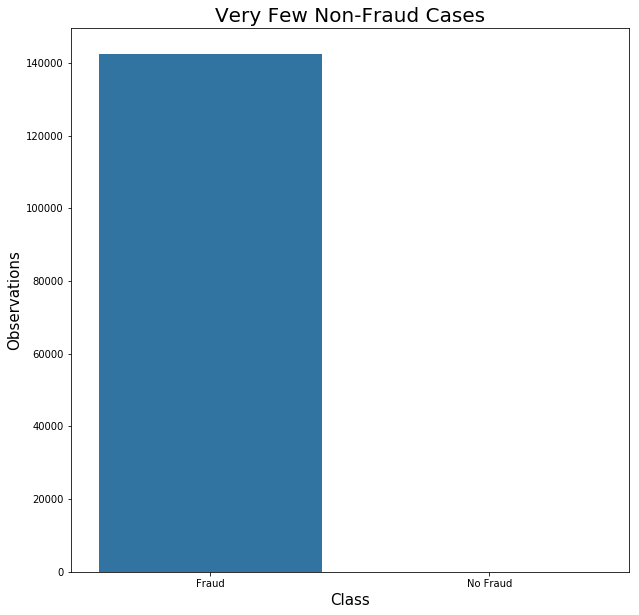

In [4]:
plt.figure(figsize=(10, 10))
sns.barplot(fraud['Class'], fraud['Class'].value_counts(), ci=None)
plt.xticks(np.arange(2), ('Fraud', 'No Fraud'))
plt.xlabel('Class', fontsize=15)
plt.ylabel('Observations', fontsize=15)
plt.title('Very Few Non-Fraud Cases', fontsize = 20);


## Observing the correlation between the Class variable and all the other variables.

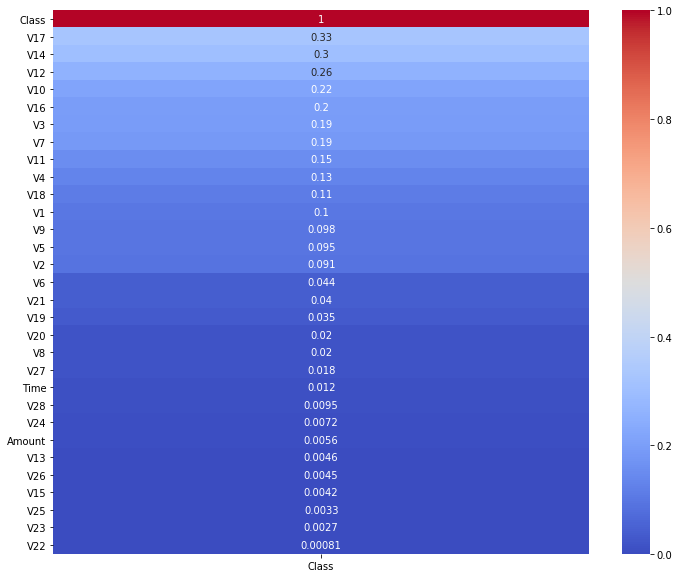

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(abs(fraud.corr()[['Class']]).sort_values('Class', ascending=False), annot=True, cmap = 'coolwarm');

### Distribution of Amounts for Fraud and Non-Fraud Charges.

/anaconda3/envs/DSI/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


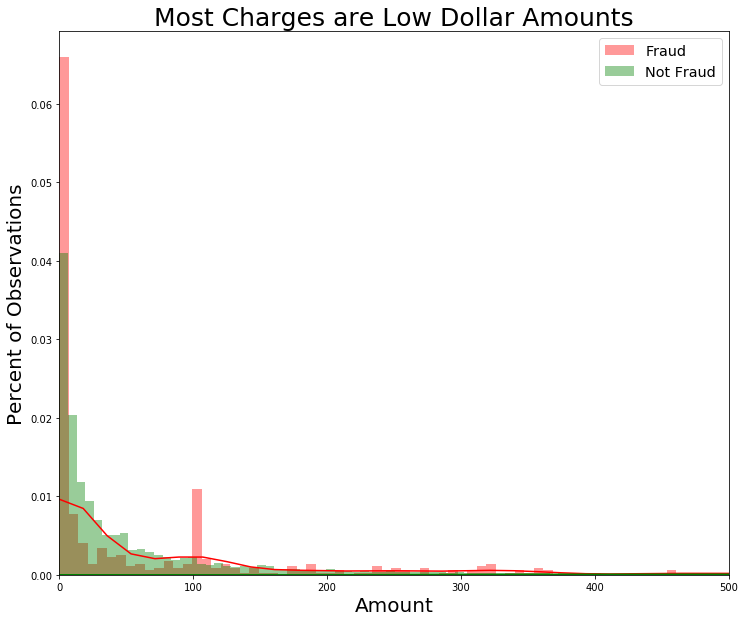

In [6]:
#examining the distributions of Amount given the class
plt.figure(figsize=(12, 10))
plt.xlim(right = 500)
sns.distplot(fraud[fraud['Class'] == 1]['Amount'], bins= 300, color='r', label='Fraud')
sns.distplot(fraud[fraud['Class'] == 0]['Amount'], bins= 4000, color='g', label='Not Fraud')
plt.xlabel('Amount', fontsize=20)
plt.ylabel('Percent of Observations', fontsize = 20)
plt.title('Most Charges are Low Dollar Amounts', fontsize = 25)
plt.legend(fontsize ='x-large');

#### What different charge amounts occured?

In [7]:
fraud_amount = fraud[fraud['Class'] == 1]['Amount'].value_counts(ascending=False)
fraud_amount.sort_values(ascending=False).head(10)

1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
12.31      3
0.68       3
Name: Amount, dtype: int64

### Distribution of Time for Fraud and Non-Fraud Charges.

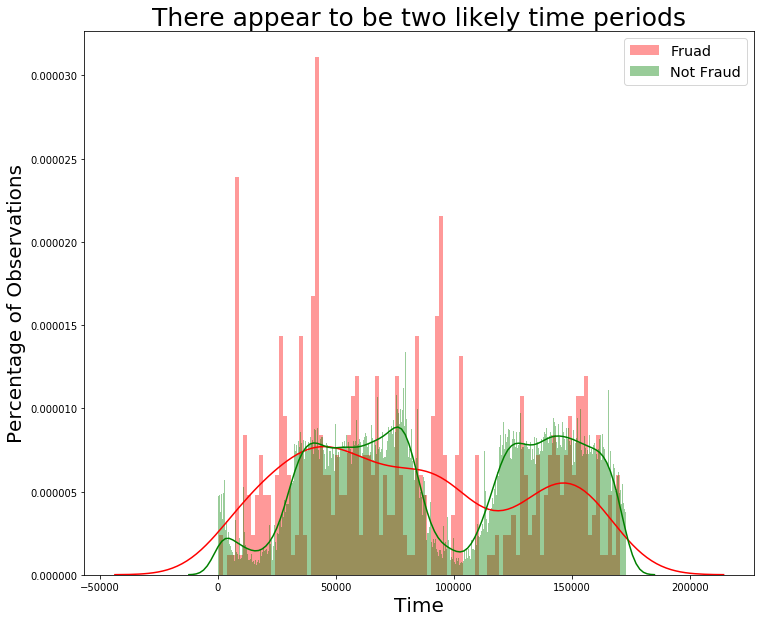

In [8]:
#examining the distributions of Time given the class
plt.figure(figsize=(12, 10))
sns.distplot(fraud[fraud['Class'] == 1]['Time'], bins= 100, color='r', label='Fruad')
sns.distplot(fraud[fraud['Class'] == 0]['Time'], bins= 2000, color='g', label="Not Fraud")
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Percentage of Observations', fontsize = 20)
plt.title('There appear to be two likely time periods', fontsize = 25)
plt.legend(fontsize ='x-large');

### Distribution of V1 values for Fraud and Non-Fraud Charges.

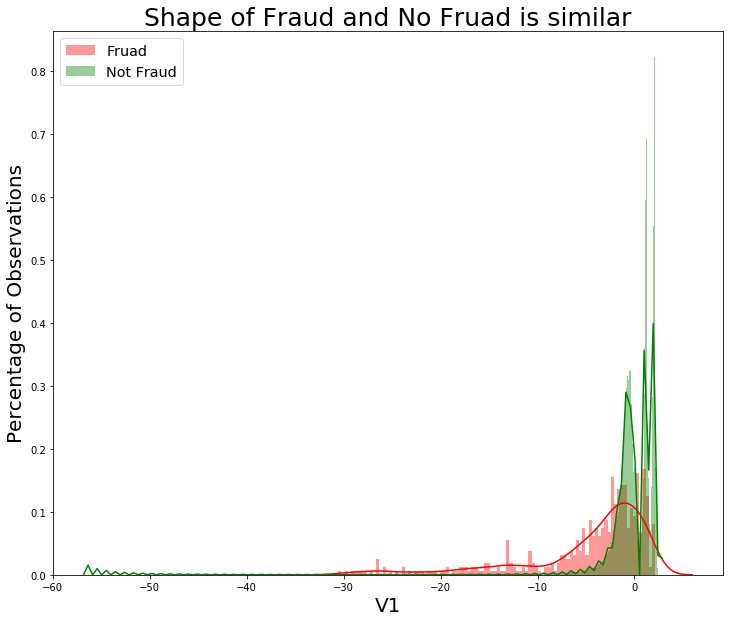

In [9]:
#examining the distributions of V1 given the class
plt.figure(figsize=(12, 10))
sns.distplot(fraud[fraud['Class'] == 1]['V1'], bins= 100, color='r', label='Fruad')
sns.distplot(fraud[fraud['Class'] == 0]['V1'], bins= 2000, color='g', label="Not Fraud")
plt.title('Shape of Fraud and No Fruad is similar', fontsize = 25)
plt.xlabel('V1', fontsize = 20)
plt.ylabel('Percentage of Observations', fontsize = 20)
plt.legend(fontsize ='x-large');

### Distribution of V17 values for Fraud and Non-Fraud Charges.

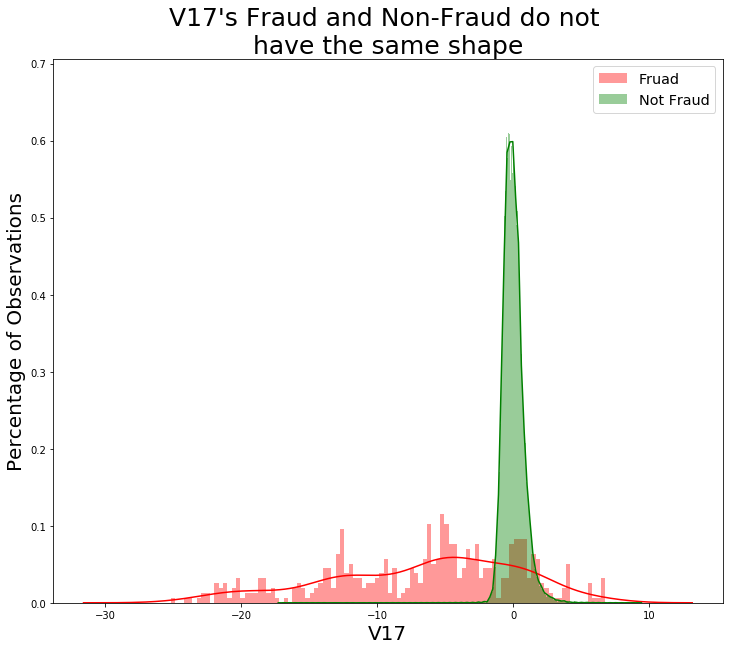

In [10]:
#examining the distributions of Time given the class
plt.figure(figsize=(12, 10))
sns.distplot(fraud[fraud['Class'] == 1]['V17'], bins= 100, color='r', label='Fruad')
sns.distplot(fraud[fraud['Class'] == 0]['V17'], bins= 2000, color='g', label="Not Fraud")
plt.title("V17's Fraud and Non-Fraud do not \nhave the same shape", fontsize = 25)
plt.xlabel('V17', fontsize = 20)
plt.ylabel('Percentage of Observations', fontsize = 20)
plt.legend(fontsize ='x-large');

### Distribution of V14 values for Fraud and Non-Fraud Charges.

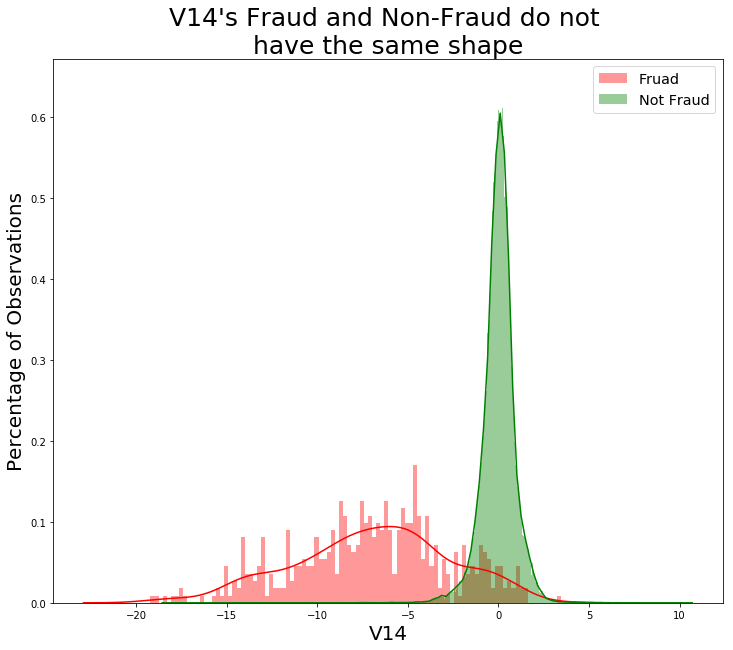

In [11]:
#examining the distributions of Time given the class
plt.figure(figsize=(12, 10))
sns.distplot(fraud[fraud['Class'] == 1]['V14'], bins= 100, color='r', label='Fruad')
sns.distplot(fraud[fraud['Class'] == 0]['V14'], bins= 2000, color='g', label="Not Fraud")
plt.title("V14's Fraud and Non-Fraud do not \nhave the same shape", fontsize = 25)
plt.xlabel('V14', fontsize = 20)
plt.ylabel('Percentage of Observations', fontsize = 20)
plt.legend(fontsize ='x-large');

### Distribution of V22 values for Fraud and Non-Fraud Charges.

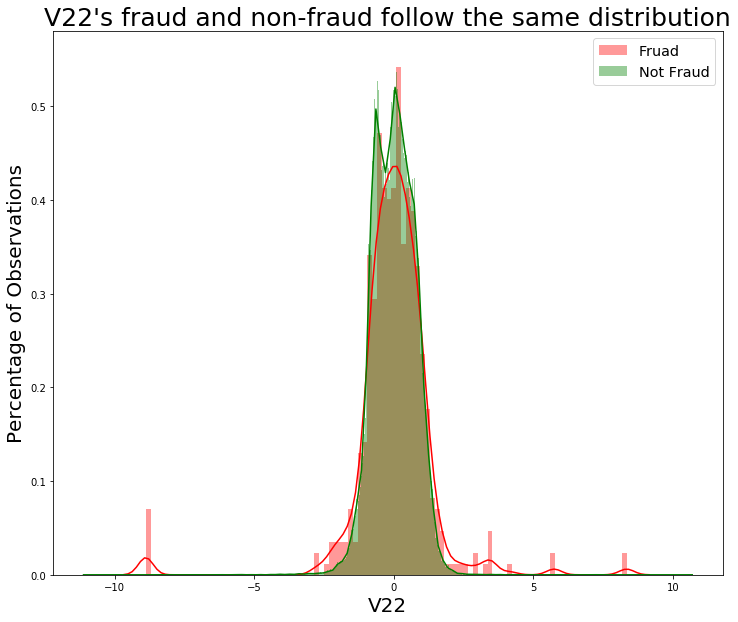

In [12]:
#examining the distributions of Time given the class
plt.figure(figsize=(12, 10))
sns.distplot(fraud[fraud['Class'] == 1]['V22'], bins= 100, color='r', label='Fruad')
sns.distplot(fraud[fraud['Class'] == 0]['V22'], bins= 2000, color='g', label="Not Fraud")
plt.title("V22's fraud and non-fraud follow the same distribution", fontsize = 25)
plt.xlabel('V22', fontsize = 20)
plt.ylabel('Percentage of Observations', fontsize = 20)
plt.legend(fontsize ='x-large');

### Boxplots of the 5 varaibles with the highest correlation to class and we can see clear difference between the fraud and non-fraud classes.

We can see that for all my boxplots the fraud distributions are consistently lower than the non-fraud distributions.

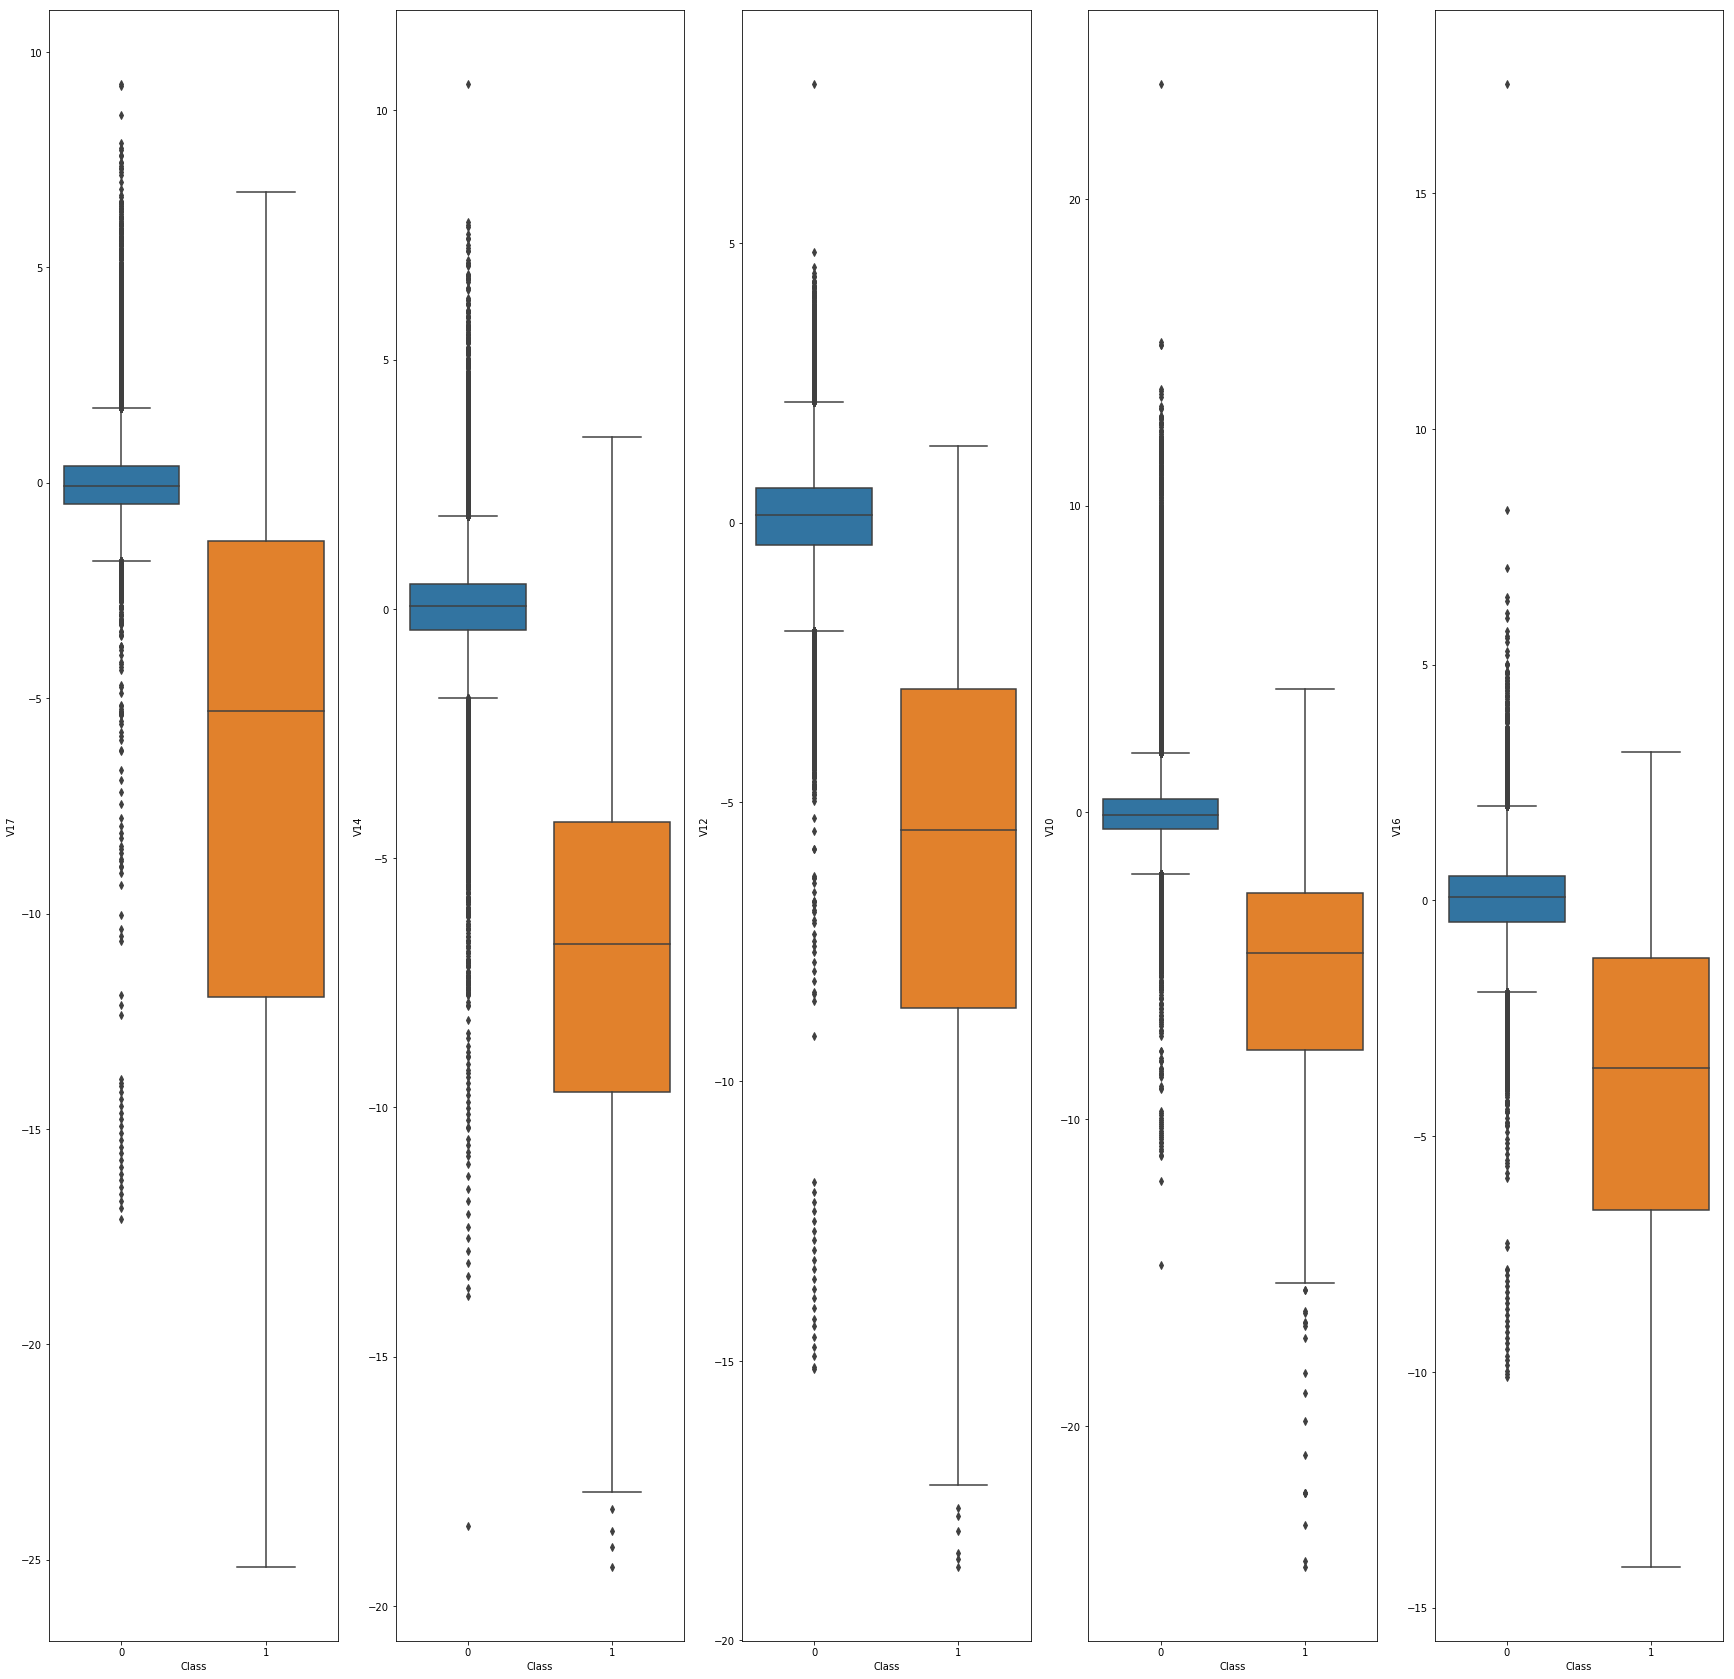

In [13]:
f, axes = plt.subplots(ncols=5, figsize=(30,30))
sns.boxplot(x="Class", y="V17", data=fraud, ax=axes[0])
sns.boxplot(x="Class", y="V14", data=fraud, ax=axes[1])
sns.boxplot(x="Class", y="V12", data=fraud, ax=axes[2])
sns.boxplot(x="Class", y="V10", data=fraud, ax=axes[3])
sns.boxplot(x="Class", y="V16", data=fraud, ax=axes[4])

In [14]:
fraud_only = fraud[fraud["Class"] == 1]
non_fraud = fraud[fraud["Class"] == 0].sample(n=20_000)
sample_fraud = pd.concat([fraud_only, non_fraud])

## Analyzing Scatterplots to see if spatial clusetering would work

#### When comparing the variables V1 and V2 fraud and non-fraud go in different directions however still overlap a lot.

/anaconda3/envs/DSI/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


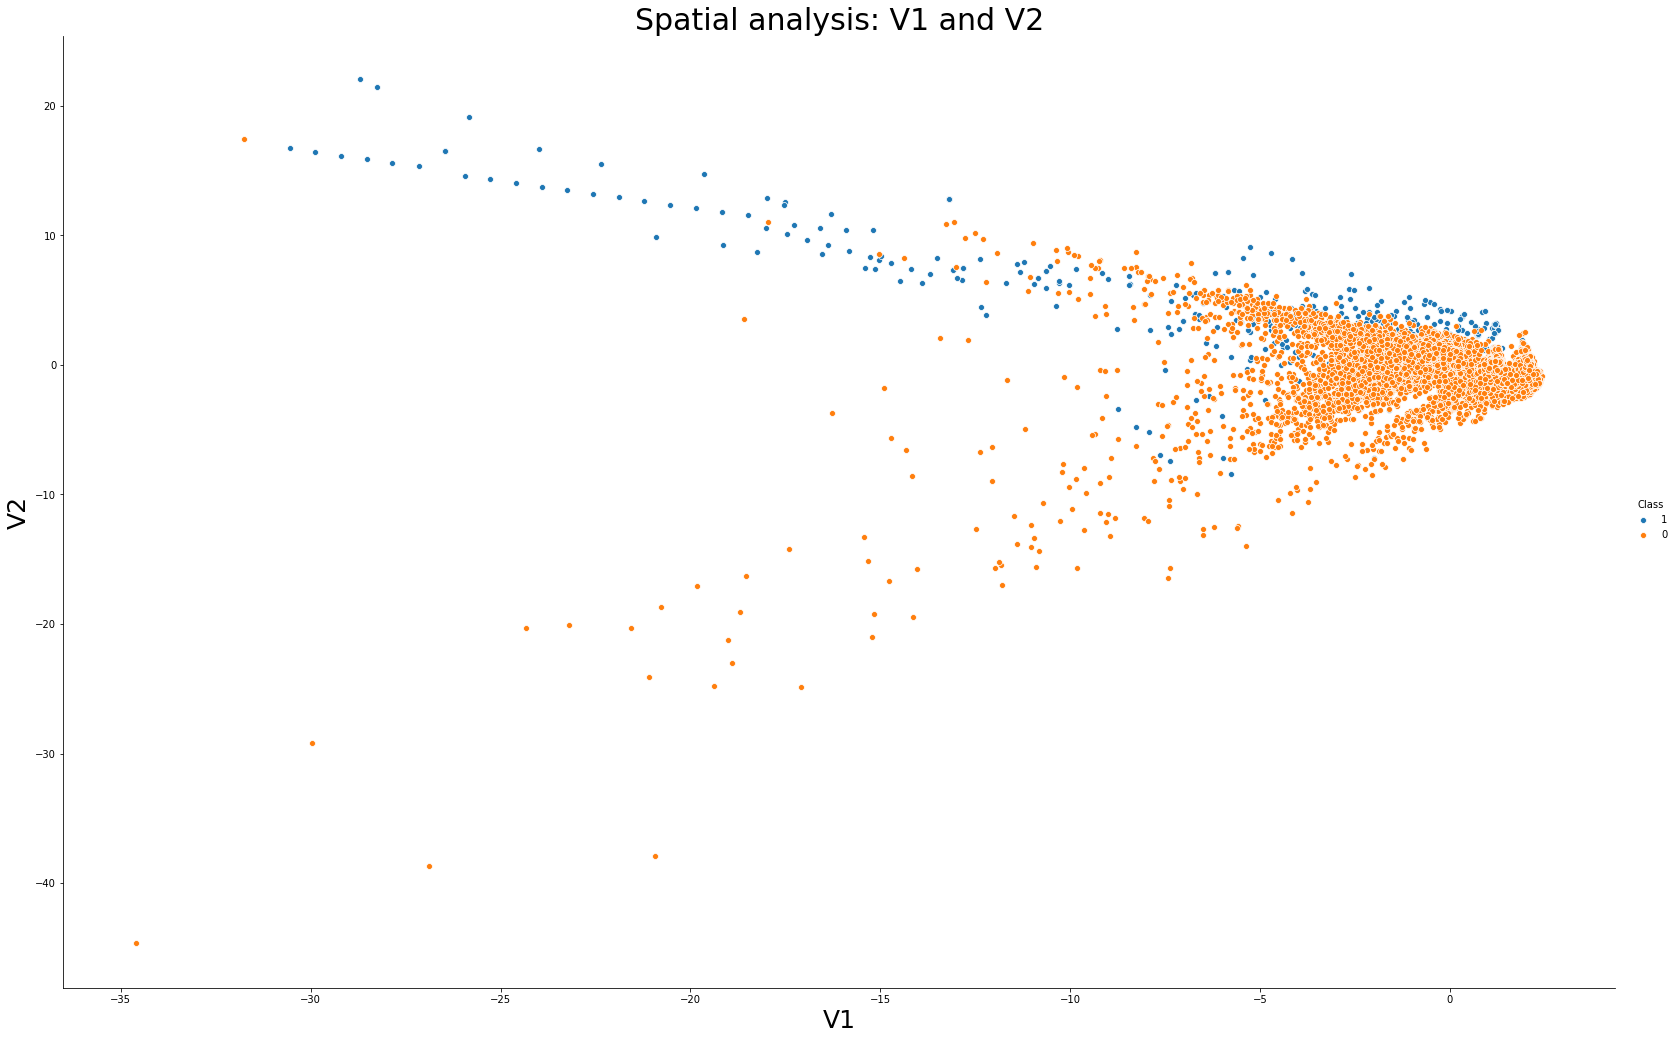

In [15]:
#Used code from the link below for assistance in creating plot.
#https://stackoverflow.com/questions/14885895/color-by-column-values-in-matplotlib
_classes = [1, 0]
fg = sns.FacetGrid(data=sample_fraud, hue='Class', hue_order=_classes, aspect=1.61, size = 14)
fg.map(sns.scatterplot, 'V1', 'V2').add_legend()
plt.title('Spatial analysis: V1 and V2', fontsize = 30)
plt.xlabel('V1', fontsize = 25)
plt.ylabel('V2', fontsize = 25);

#### When comparing the variables V2 and V3 fraud and non-fraud go in different directions however still overlap a lot. This is similar to the plot of V1 and V2 above.

/anaconda3/envs/DSI/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(22.181924033200247, 0.5, 'V3')

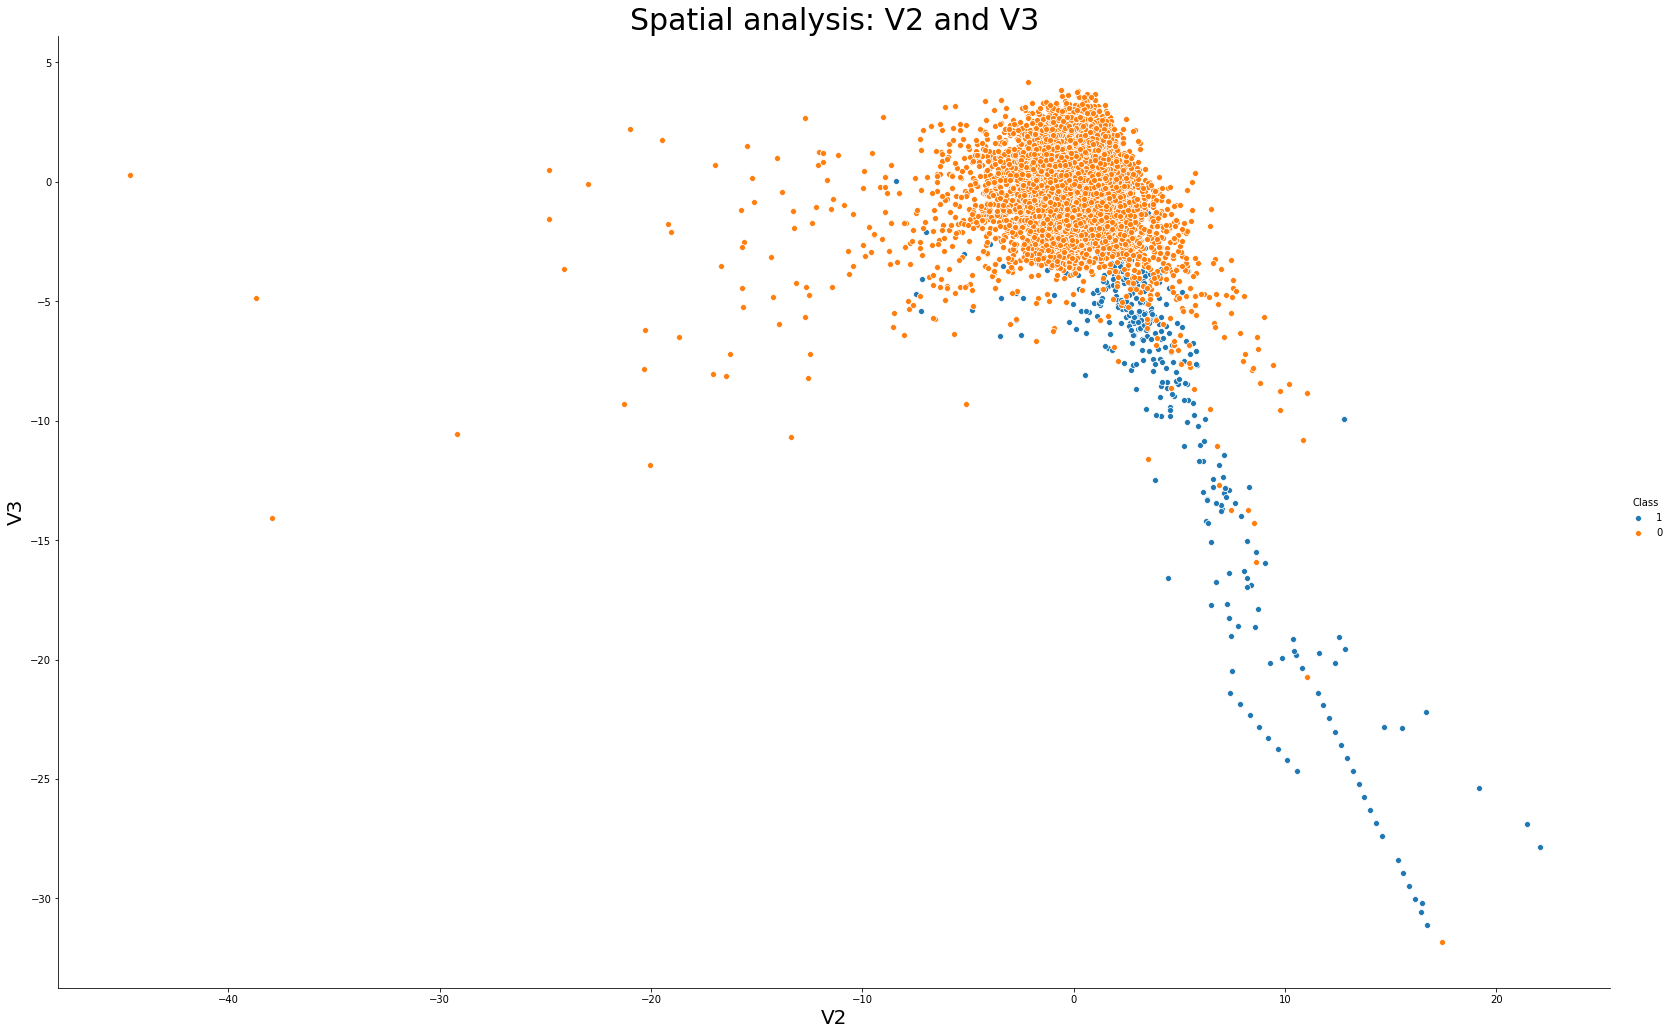

In [16]:
_classes = [1, 0]
fg = sns.FacetGrid(data=sample_fraud, hue='Class', hue_order=_classes, aspect=1.61, size =14)
fg.map(sns.scatterplot, 'V2', 'V3').add_legend()
plt.title('Spatial analysis: V2 and V3', fontsize = 30)
plt.xlabel('V2', fontsize = 20)
plt.ylabel('V3', fontsize = 20)

#### When comparing the variables V5 and V6 fraud and non-fraud the non-fraud datapoints almost completely overlap the fraud datapoints.

/anaconda3/envs/DSI/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(22.181924033200247, 0.5, 'V6')

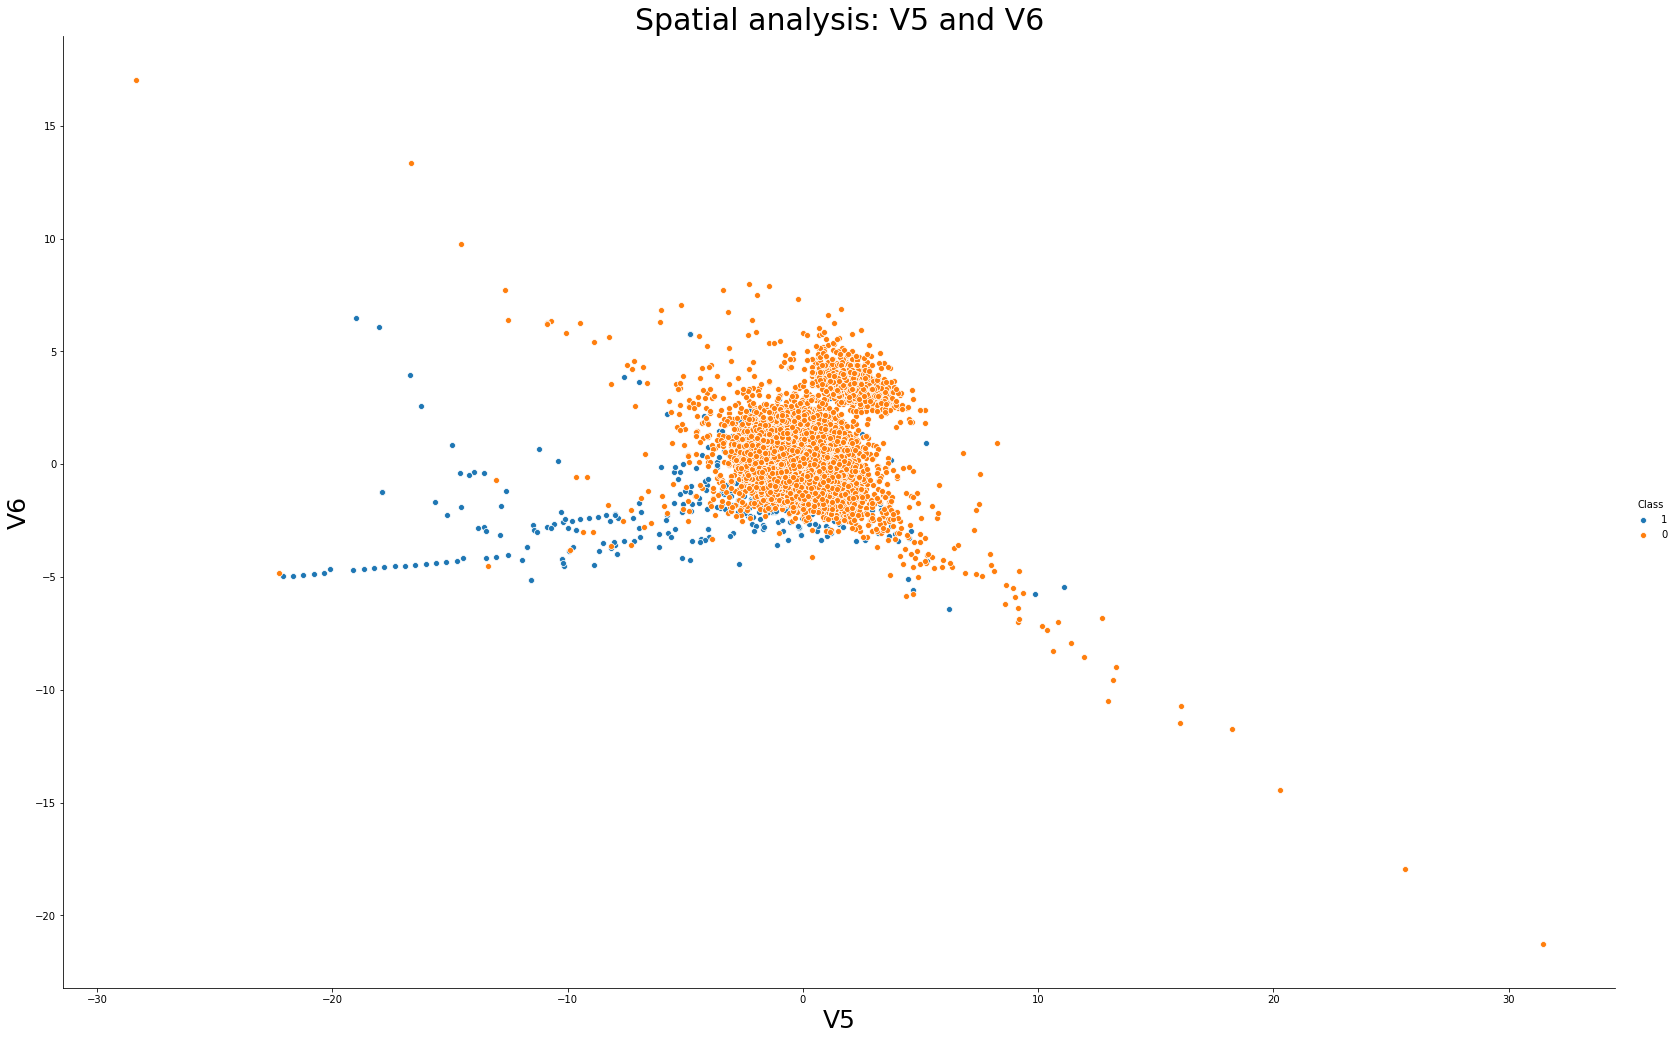

In [17]:
_classes = [1, 0]
fg = sns.FacetGrid(data=sample_fraud, hue='Class', hue_order=_classes, aspect=1.61, size = 14)
fg.map(sns.scatterplot, 'V5', 'V6').add_legend()
plt.title('Spatial analysis: V5 and V6', fontsize = 30)
plt.xlabel('V5', fontsize = 25)
plt.ylabel('V6', fontsize = 25)

#### When comparing Amount and V1 there is not a distinct difference between fraud and non-fraud charges. We do see that non-fraud charges have more higher amount charges and fraud has more lower value V1 values.

/anaconda3/envs/DSI/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


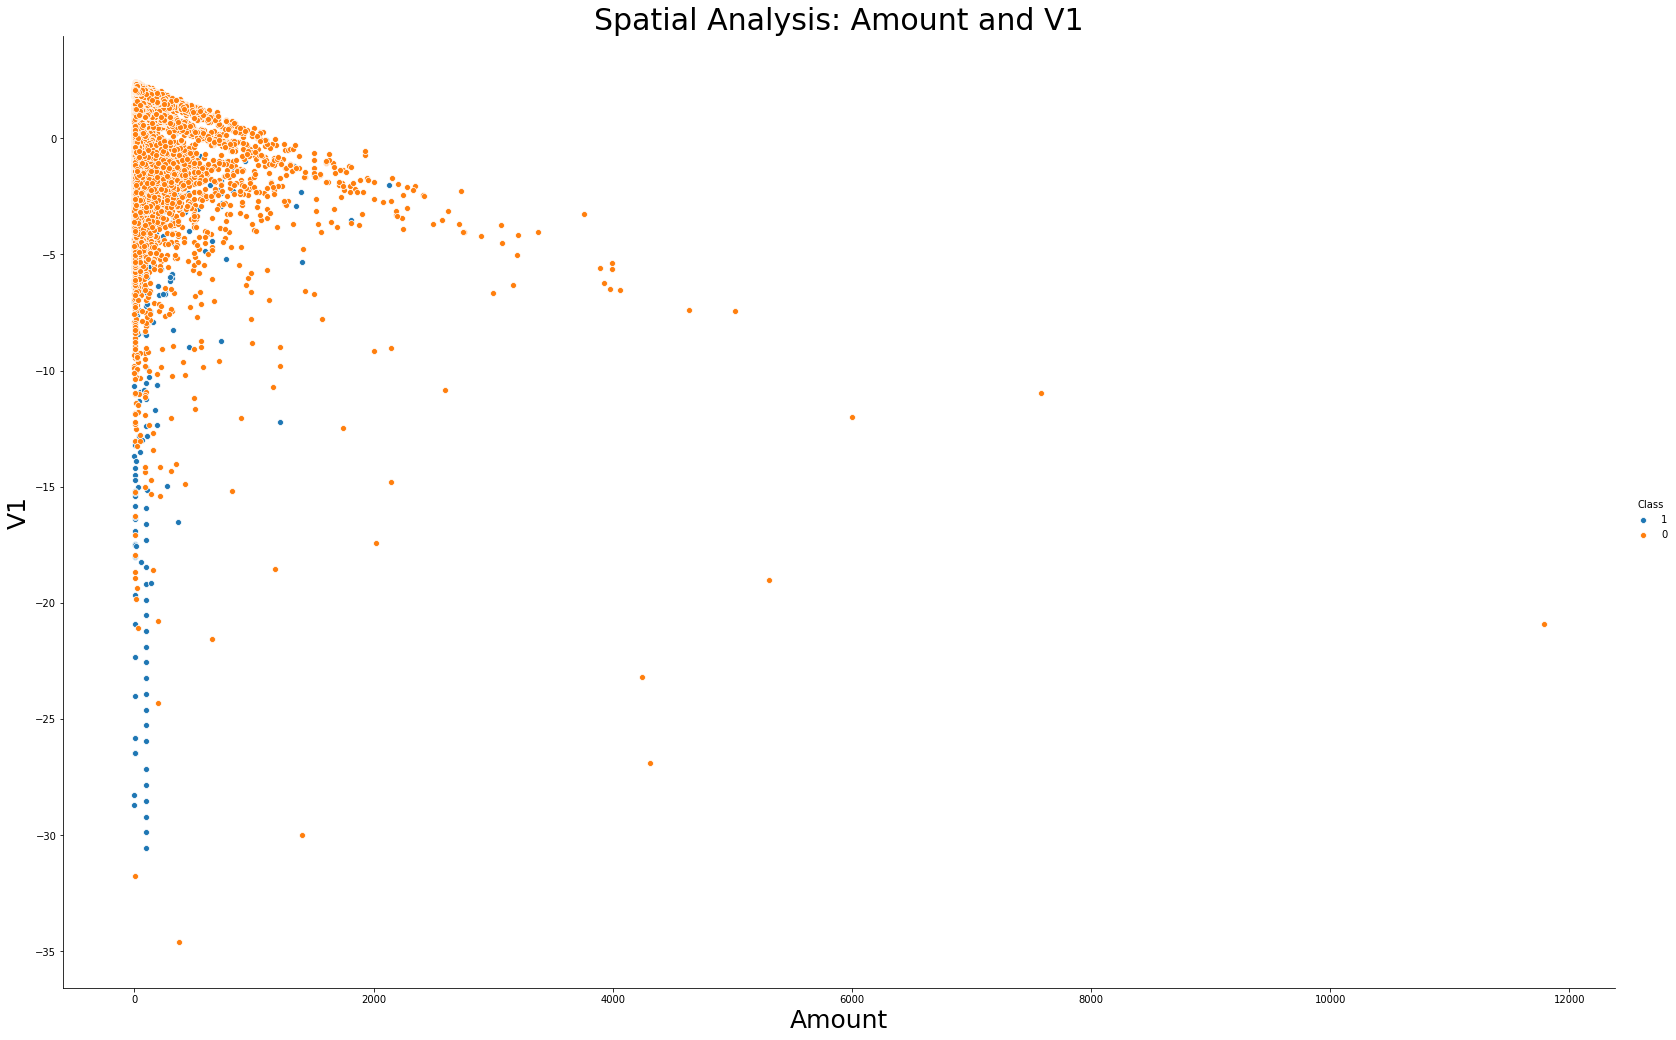

In [18]:
_classes = [1, 0]
fg = sns.FacetGrid(data=sample_fraud, hue='Class', hue_order=_classes, aspect=1.61, size=14)
fg.map(sns.scatterplot, 'Amount', 'V1').add_legend()
plt.title('Spatial Analysis: Amount and V1', fontsize = 30)
plt.xlabel('Amount', fontsize = 25)
plt.ylabel('V1', fontsize = 25);

#### When comparing Amount and V7 there is not a distinct difference between fraud and non-fraud charges.

/anaconda3/envs/DSI/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


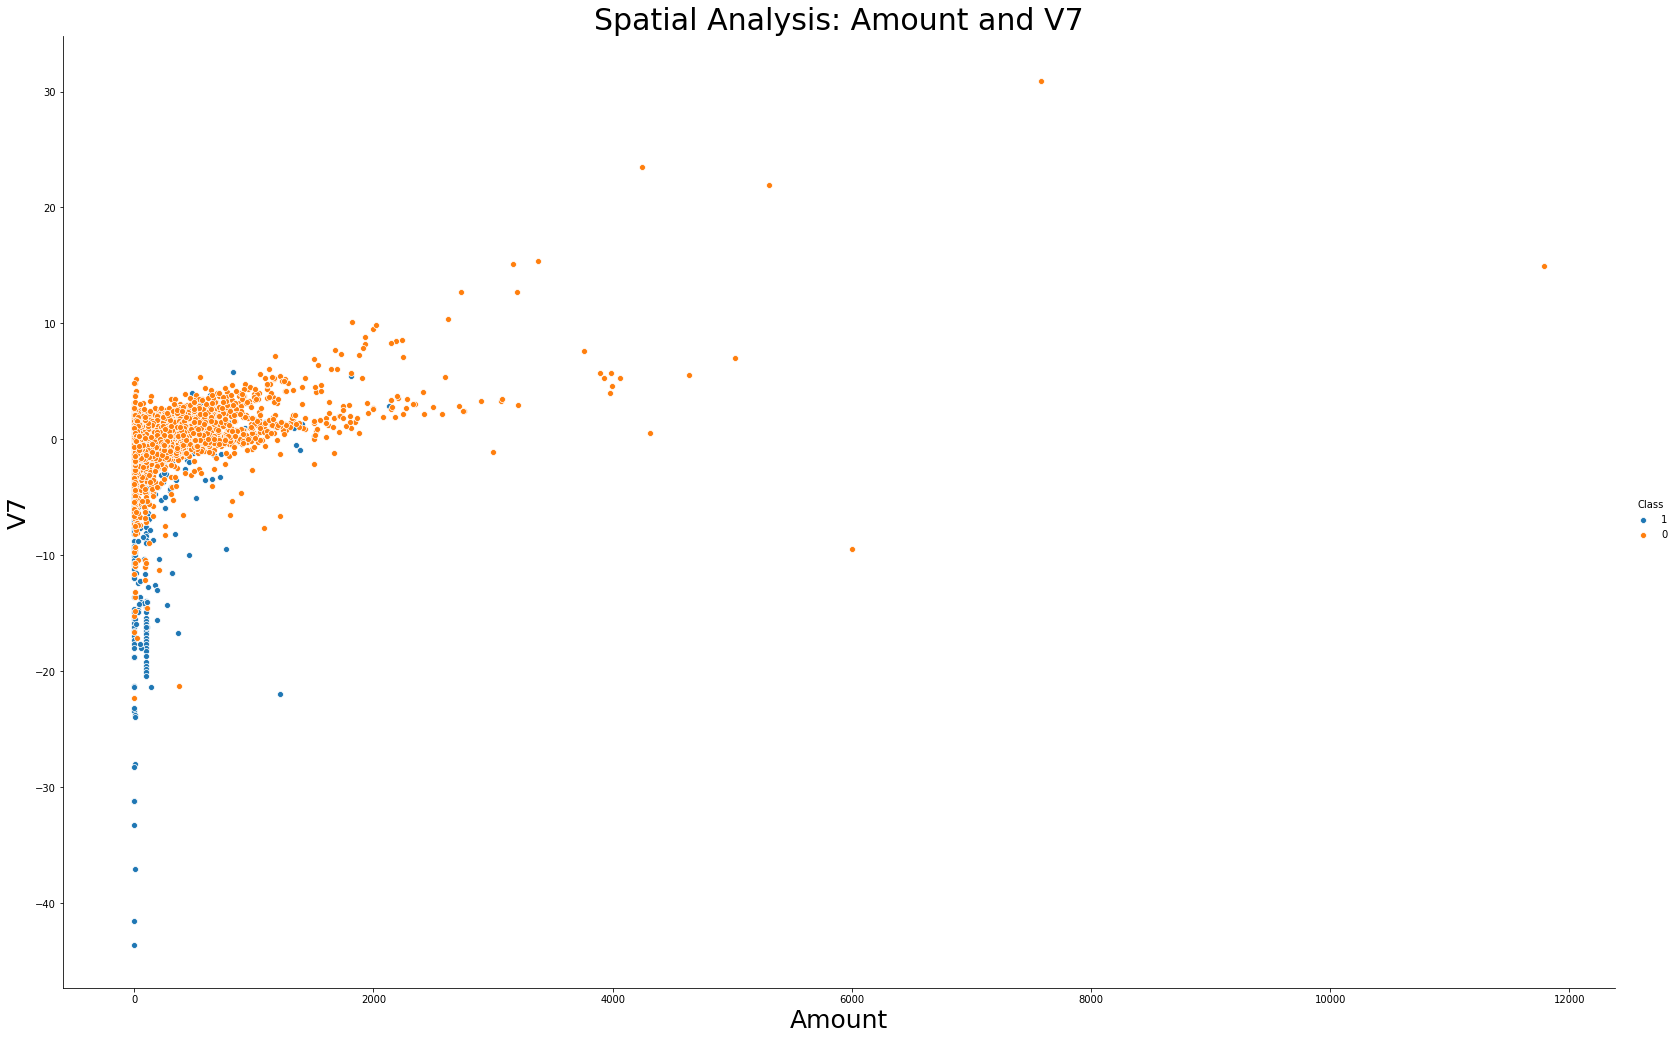

In [19]:
_classes = [1, 0]
fg = sns.FacetGrid(data=sample_fraud, hue='Class', hue_order=_classes, aspect=1.61, size = 14)
fg.map(sns.scatterplot, 'Amount', 'V7').add_legend()
plt.title('Spatial Analysis: Amount and V7', fontsize = 30)
plt.xlabel('Amount', fontsize = 25)
plt.ylabel('V7', fontsize = 25);